### "Central Statistics Office SES-01 Dataset - (Mean and Median Earnings per hour and paid weekly hours)"

#### Import all Libraries for Required Project

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sp
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

#### Data Pre-processing & Exploratory Data Analysis (EDA)

Now that we have imported our dataset using the pandas library, let's examine the first 10 rows to gain a general understanding of our data as well as any possible null values.

In [2]:
data = pd.read_csv('CA01-Dataset.csv')
data.head(10)

,Statistic Label,Year,Full and Part Time Status,Economic Sector NACE Rev 2,UNIT,VALUE
0,Mean earnings per hour,2022,All employment status,All NACE economic sectors,Euro,26.40
1,Mean earnings per hour,2022,All employment status,Construction (F),Euro,22.60
2,Mean earnings per hour,2022,All employment status,Wholesale and retail trade; repair of motor ve...,Euro,20.63
3,Mean earnings per hour,2022,All employment status,Transportation and storage (H),Euro,23.02
4,Mean earnings per hour,2022,All employment status,Accommodation and food service activities (I),Euro,16.38
5,Mean earnings per hour,2022,All employment status,Information and communication (J),Euro,42.44
6,Mean earnings per hour,2022,All employment status,"Professional, scientific and technical activit...",Euro,30.72
7,Mean earnings per hour,2022,All employment status,Administrative and support service activities (N),Euro,21.85
8,Mean earnings per hour,2022,All employment status,Public administration and defence; compulsory ...,Euro,28.32
9,Mean earnings per hour,2022,All employment status,Education (P),Euro,35.91


Now Importing the required libraries for EDA (Exploratory Data Analysis). This step is very important especially when we arrive at modelling the data to apply Machine learning. Plotting in EDA consists of Histograms, Box plot, Scatter plots and many more. Through the process of EDA, we can also refine the problem statement or definition of our problem.

In [12]:
data.shape

(168, 6)

In [18]:
data.head(5)

,Statistic Label,Year,Full and Part Time Status,Economic Sector NACE Rev 2,UNIT,VALUE
0,Mean earnings per hour,2022,All employment status,All NACE economic sectors,Euro,26.40
1,Mean earnings per hour,2022,All employment status,Construction (F),Euro,22.60
2,Mean earnings per hour,2022,All employment status,Wholesale and retail trade; repair of motor ve...,Euro,20.63
3,Mean earnings per hour,2022,All employment status,Transportation and storage (H),Euro,23.02
4,Mean earnings per hour,2022,All employment status,Accommodation and food service activities (I),Euro,16.38


In [19]:
data.tail(5)

,Statistic Label,Year,Full and Part Time Status,Economic Sector NACE Rev 2,UNIT,VALUE
163,Median paid weekly hours,2022,Part-time,Education (P),Hours,16.8
164,Median paid weekly hours,2022,Part-time,Human health and social work activities (Q),Hours,19.8
165,Median paid weekly hours,2022,Part-time,Industry (B to E),Hours,20.5
166,Median paid weekly hours,2022,Part-time,"Financial, insurance and real estate activitie...",Hours,19.8
167,Median paid weekly hours,2022,Part-time,"Arts, entertainment, recreation and other serv...",Hours,19.3


In [15]:
data.dtypes

Statistic Label                object
Year                            int64
Full and Part Time Status      object
Economic Sector NACE Rev 2     object
UNIT                           object
VALUE                         float64
dtype: object

In [21]:
data.count

<bound method DataFrame.count of               Statistic Label  Year Full and Part Time Status  \
0      Mean earnings per hour  2022     All employment status   
1      Mean earnings per hour  2022     All employment status   
2      Mean earnings per hour  2022     All employment status   
3      Mean earnings per hour  2022     All employment status   
4      Mean earnings per hour  2022     All employment status   
..                        ...   ...                       ...   
163  Median paid weekly hours  2022                 Part-time   
164  Median paid weekly hours  2022                 Part-time   
165  Median paid weekly hours  2022                 Part-time   
166  Median paid weekly hours  2022                 Part-time   
167  Median paid weekly hours  2022                 Part-time   

                            Economic Sector NACE Rev 2   UNIT  VALUE  
0                            All NACE economic sectors   Euro  26.40  
1                                     Constr

In [17]:
print(data)

              Statistic Label  Year Full and Part Time Status  \
0      Mean earnings per hour  2022     All employment status   
1      Mean earnings per hour  2022     All employment status   
2      Mean earnings per hour  2022     All employment status   
3      Mean earnings per hour  2022     All employment status   
4      Mean earnings per hour  2022     All employment status   
..                        ...   ...                       ...   
163  Median paid weekly hours  2022                 Part-time   
164  Median paid weekly hours  2022                 Part-time   
165  Median paid weekly hours  2022                 Part-time   
166  Median paid weekly hours  2022                 Part-time   
167  Median paid weekly hours  2022                 Part-time   

                            Economic Sector NACE Rev 2   UNIT  VALUE  
0                            All NACE economic sectors   Euro  26.40  
1                                     Construction (F)   Euro  22.60  
2    W

In [3]:
data.isna().sum()

Statistic Label               0
Year                          0
Full and Part Time Status     0
Economic Sector NACE Rev 2    0
UNIT                          0
VALUE                         0
dtype: int64

Since our data contains no null values, we may proceed to the analysis stage.

#### Statistics About Dataset

We will examine the data in each column to determine the appropriate questions to pose for our statistical analysis

In [4]:
data[['Statistic Label','Full and Part Time Status','Economic Sector NACE Rev 2','UNIT']].describe()

,Statistic Label,Full and Part Time Status,Economic Sector NACE Rev 2,UNIT
count,168,168,168,168
unique,4,3,14,2
top,Mean earnings per hour,All employment status,All NACE economic sectors,Euro
freq,42,56,12,84


We will search for unique values in each field, with the exception of VALUE, which is continuous, given the aforementioned table does not provide us with much information about the dataset.

In [5]:
data_1 = data.drop(columns=['VALUE'])

for column in data_1.columns:
    print(column,'\n',data[column].unique(),'\n')

Statistic Label 
 ['Mean earnings per hour' 'Mean paid weekly hours'
 'Median earnings per hour' 'Median paid weekly hours'] 

Year 
 [2022] 

Full and Part Time Status 
 ['All employment status' 'Full-time' 'Part-time'] 

Economic Sector NACE Rev 2 
 ['All NACE economic sectors' 'Construction (F)'
 'Wholesale and retail trade; repair of motor vehicles and motorcycles (G)'
 'Transportation and storage (H)'
 'Accommodation and food service activities (I)'
 'Information and communication (J)'
 'Professional, scientific and technical activities (M)'
 'Administrative and support service activities (N)'
 'Public administration and defence; compulsory social security (O)'
 'Education (P)' 'Human health and social work activities (Q)'
 'Industry (B to E)'
 'Financial, insurance and real estate activities (K,L)'
 'Arts, entertainment, recreation and other service activities (R,S)'] 

UNIT 
 ['Euro' 'Hours'] 



In [6]:
print('Unit Euro is for statistic label',data_1[data_1['UNIT'] == 'Euro']['Statistic Label'].unique())
print('Unit Hours is for statistic label',data_1[data_1['UNIT'] == 'Hours']['Statistic Label'].unique())

Unit Euro is for statistic label ['Mean earnings per hour' 'Median earnings per hour']
Unit Hours is for statistic label ['Mean paid weekly hours' 'Median paid weekly hours']


There are two Units described for each statistic label

To get better statistics, we will plot normal distribution for each statistic label correspond to the full and part time status

In [8]:
data_2 = data[['Statistic Label','Full and Part Time Status','VALUE']]
data_2

,Statistic Label,Full and Part Time Status,VALUE
0,Mean earnings per hour,All employment status,26.40
1,Mean earnings per hour,All employment status,22.60
2,Mean earnings per hour,All employment status,20.63
3,Mean earnings per hour,All employment status,23.02
4,Mean earnings per hour,All employment status,16.38
...,...,...,...
163,Median paid weekly hours,Part-time,16.80
164,Median paid weekly hours,Part-time,19.80
165,Median paid weekly hours,Part-time,20.50
166,Median paid weekly hours,Part-time,19.80


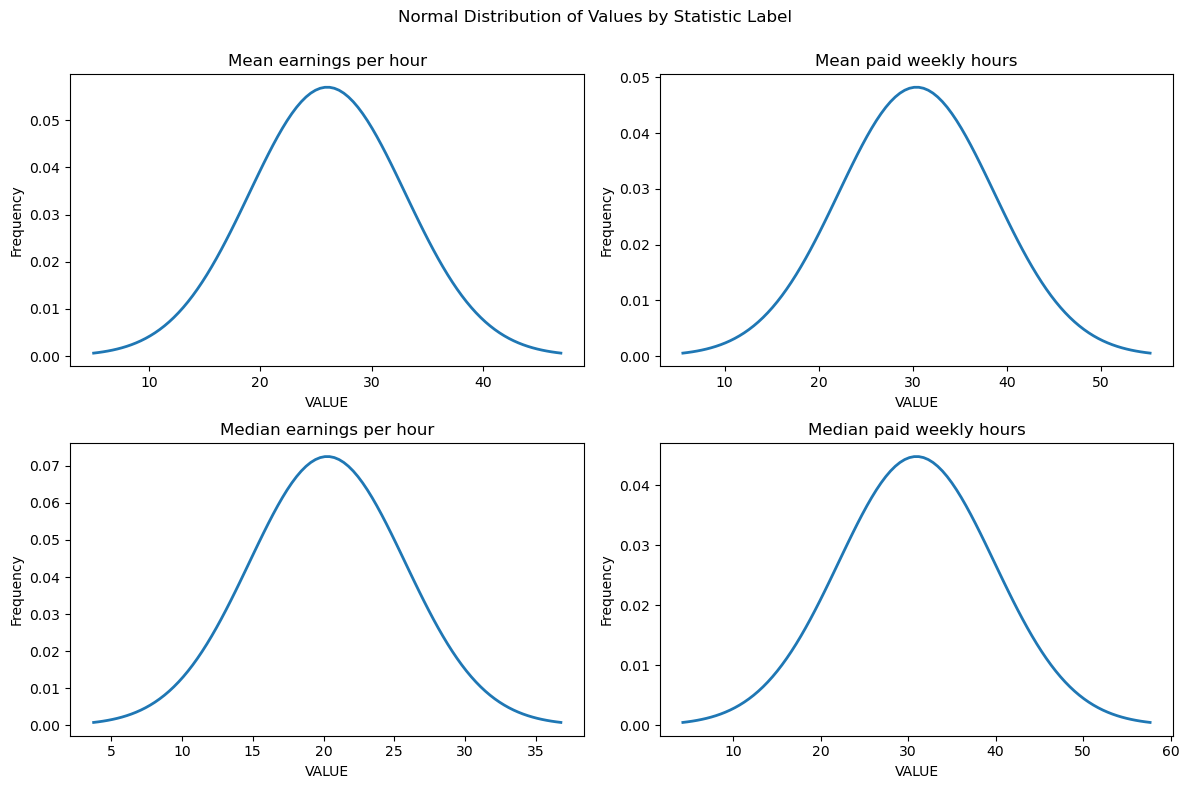

In [9]:
# Filter the DataFrame for the four unique combinations of 'Statistic Label'
unique_stat_labels = data_2['Statistic Label'].unique()
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Normal Distribution of Values by Statistic Label')

for i, label in enumerate(unique_stat_labels):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    
    data_filtered = data_2[data_2['Statistic Label'] == label]['VALUE']
    # Calculate the mean and standard deviation for the component's data
    mean_value = np.mean(data_filtered)
    std_value = np.std(data_filtered)

    # Create the frozen normal distribution
    pdf = sp.norm(loc=mean_value, scale=std_value)

    # Generate values for the x-axis
    x = np.linspace(mean_value - 3 * std_value, mean_value + 3 * std_value, 100)

    # Calculate the PDF for the component's data
    pdf_values = pdf.pdf(x)

    # Plot the PDF in the current subplot
    ax = axes[row, col]
    ax.plot(x, pdf_values, lw=2, label='PDF')
    ax.set_title(label)
    ax.set_xlabel('VALUE')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

This normal distribution gives us a better outlook of how per hour earning is spread of individuals with weekly hour worked for that amount. Now we will move forward towards our further Exploratory Data Analysis

In [22]:
print(x)

[ 4.23671599  4.77628209  5.3158482   5.8554143   6.3949804   6.93454651
  7.47411261  8.01367871  8.55324481  9.09281092  9.63237702 10.17194312
 10.71150923 11.25107533 11.79064143 12.33020754 12.86977364 13.40933974
 13.94890585 14.48847195 15.02803805 15.56760416 16.10717026 16.64673636
 17.18630247 17.72586857 18.26543467 18.80500077 19.34456688 19.88413298
 20.42369908 20.96326519 21.50283129 22.04239739 22.5819635  23.1215296
 23.6610957  24.20066181 24.74022791 25.27979401 25.81936012 26.35892622
 26.89849232 27.43805842 27.97762453 28.51719063 29.05675673 29.59632284
 30.13588894 30.67545504 31.21502115 31.75458725 32.29415335 32.83371946
 33.37328556 33.91285166 34.45241777 34.99198387 35.53154997 36.07111608
 36.61068218 37.15024828 37.68981438 38.22938049 38.76894659 39.30851269
 39.8480788  40.3876449  40.927211   41.46677711 42.00634321 42.54590931
 43.08547542 43.62504152 44.16460762 44.70417373 45.24373983 45.78330593
 46.32287203 46.86243814 47.40200424 47.94157034 48.

In [24]:
print(ax)

Axes(0.553757,0.0728472;0.428294x0.36551)
